# 2. Klasyfikacja grzybów (https://archive.ics.uci.edu/ml/datasets/Mushroom)
Przy użyciu danych mushrooms.csv zbuduj następujące modele: AdaBoost, XGBoost, LightGBM oraz CatBoost. Porównaj ich wyniki. Spróbuj ulepszyć wyniki każdego z wariantów poprzed dostrojenie parametrów - skorzystaj z dokumentacji wymienionych metod. 

# 1. Konfiguracja danych i wstępny przegląd danych

In [1]:
# EDA i Feature Engineering
import pandas as pd
import numpy as np

# EDA i 
import matplotlib.pyplot as plt
import seaborn as sns

# Moduły ML (zespołowe) - klasyfikatory
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb

In [2]:
df = pd.read_csv('../Dane/mushrooms.csv')

In [3]:
df.shape

(8124, 23)

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
df.duplicated().sum()
print(f'Całkowita liczba zduplikowanych wartości w zbiorze: {df.duplicated().sum()}') 

Całkowita liczba zduplikowanych wartości w zbiorze: 0


# 2. Eksploracyjna Analiza Danych (EDA)

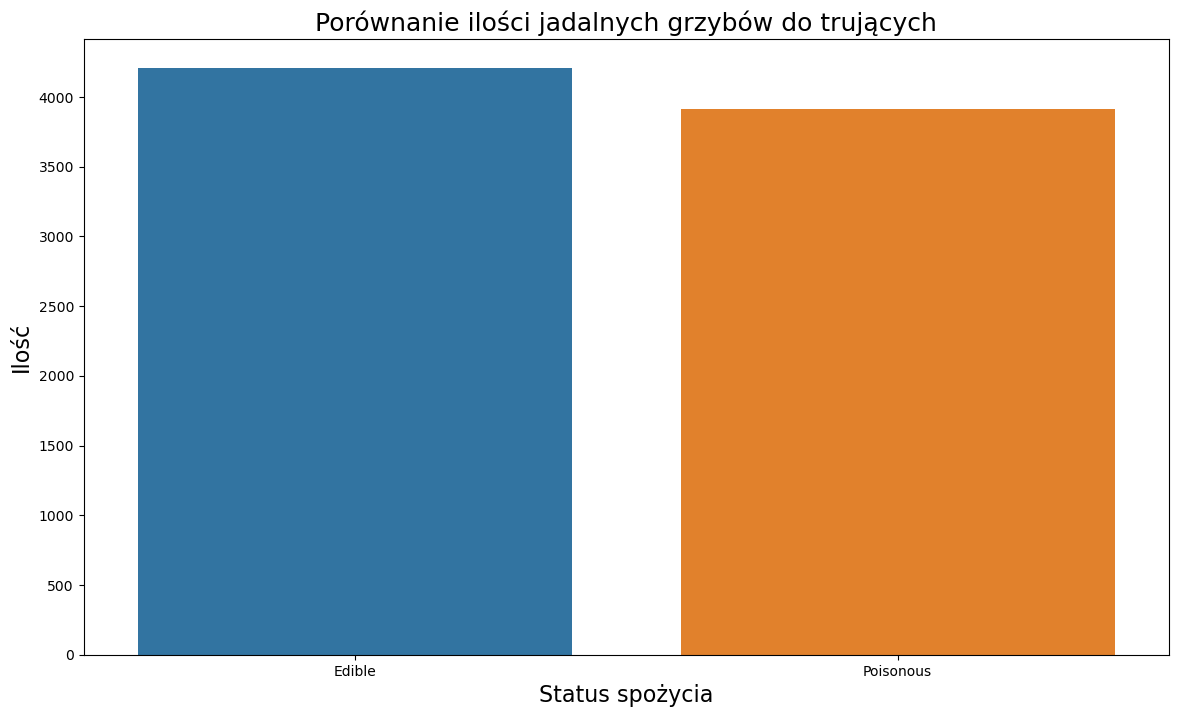

In [9]:
mushrooms_edible_status_count = df['class'].value_counts().reset_index()
mushrooms_edible_status_count['class'] = mushrooms_edible_status_count['class'].map({'e': 'Edible', 'p': 'Poisonous'})

fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(mushrooms_edible_status_count, x='class', y='count', hue='class', ax=ax)
ax.set_title('Porównanie ilości jadalnych grzybów do trujących', fontsize=18)
ax.set_xlabel('Status spożycia', fontsize=16)
ax.set_ylabel('Ilość', fontsize=16)
plt.show()

In [10]:
stalk_root_df = df.groupby('stalk-root').agg(stalk_root_count=('stalk-root', 'count')).reset_index()
stalk_root_unknown = stalk_root_df.iloc[0]
stalk_root_known = stalk_root_df.iloc[1:].sum()

stalk_root_df = pd.DataFrame([stalk_root_known, stalk_root_unknown]).reset_index(drop=True)
stalk_root_df

,stalk-root,stalk_root_count
0,bcer,5644
1,?,2480


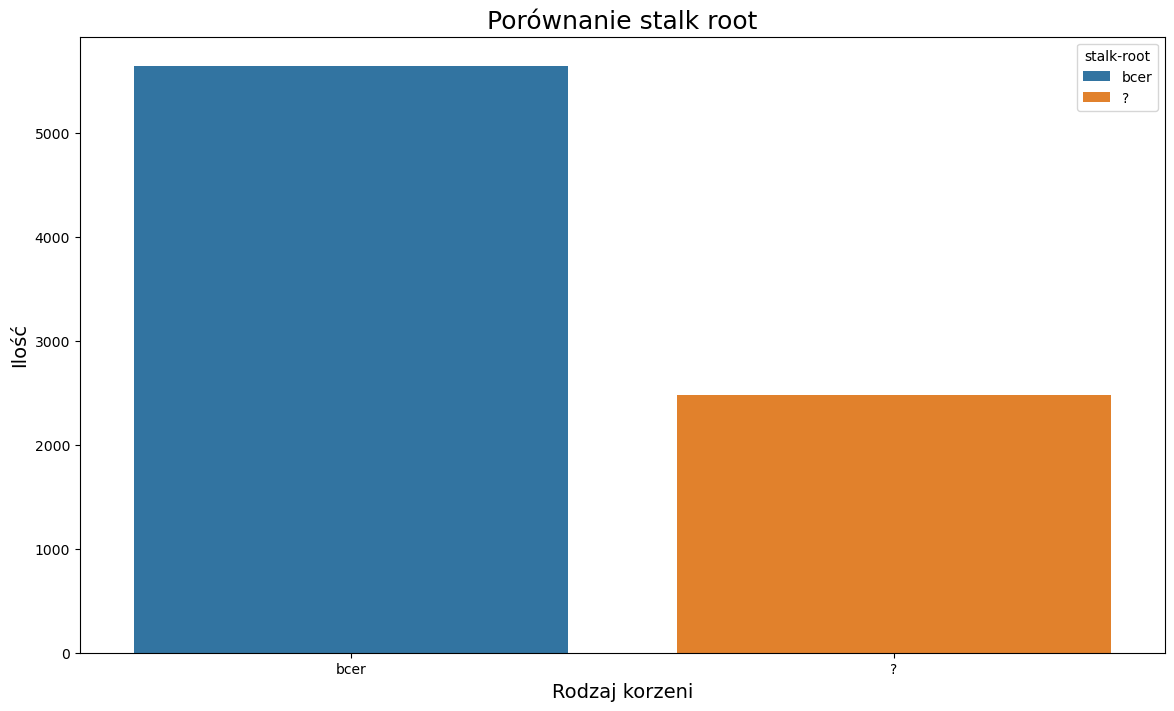

In [11]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(stalk_root_df, x='stalk-root', y='stalk_root_count', hue='stalk-root', ax=ax, legend=['Wszystkie znane', 'Nieznane'])
ax.set_title('Porównanie stalk root', fontsize=18)
ax.set_xlabel('Rodzaj korzeni', fontsize=14)
ax.set_ylabel('Ilość', fontsize=14)
plt.show()

## Znaczna większość niezidentyfikowanych grzybów jest trująca.

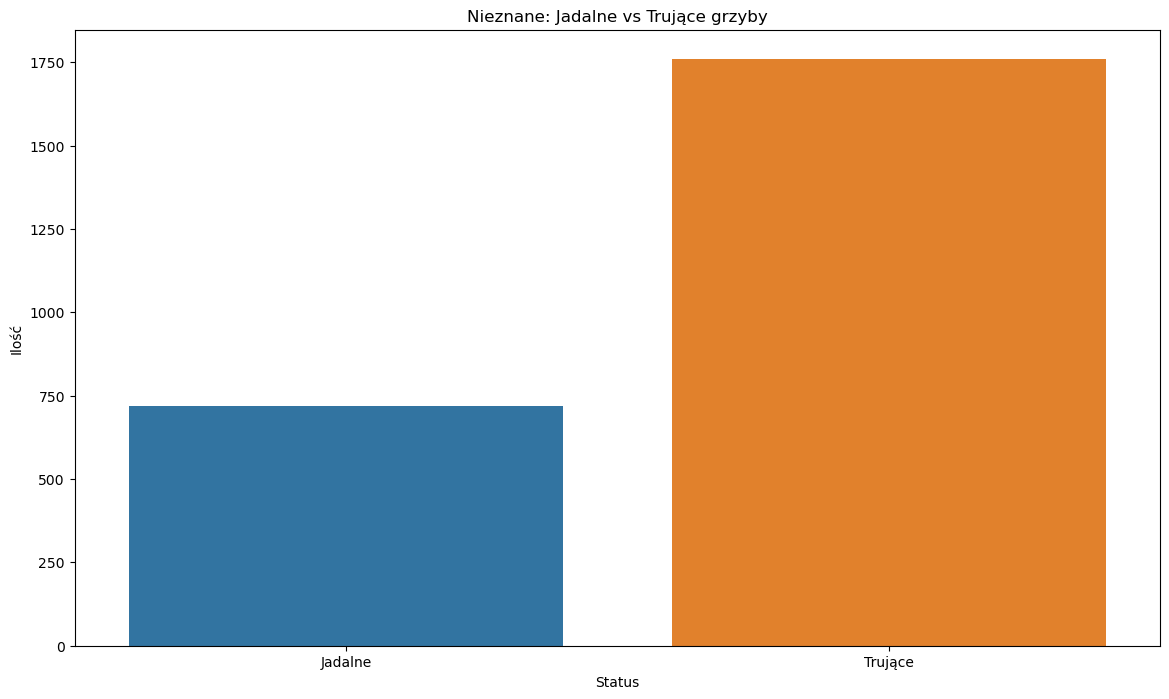

In [12]:
edible_df = df[df['class'] == 'e']
poisonous_df = df[df['class'] == 'p']

unknown_edible = edible_df[edible_df['stalk-root'] == '?']['stalk-root'].count()
unknown_poisonous = poisonous_df[poisonous_df['stalk-root'] == '?']['stalk-root'].count()
unknown_df = pd.DataFrame({'Status': ['Jadalne', 'Trujące'], 'Ilość': [unknown_edible, unknown_poisonous]})

plt.figure(figsize=(14, 8))
plt.title('Nieznane: Jadalne vs Trujące grzyby')
sns.barplot(unknown_df, x='Status', y='Ilość', hue='Status')
plt.show()

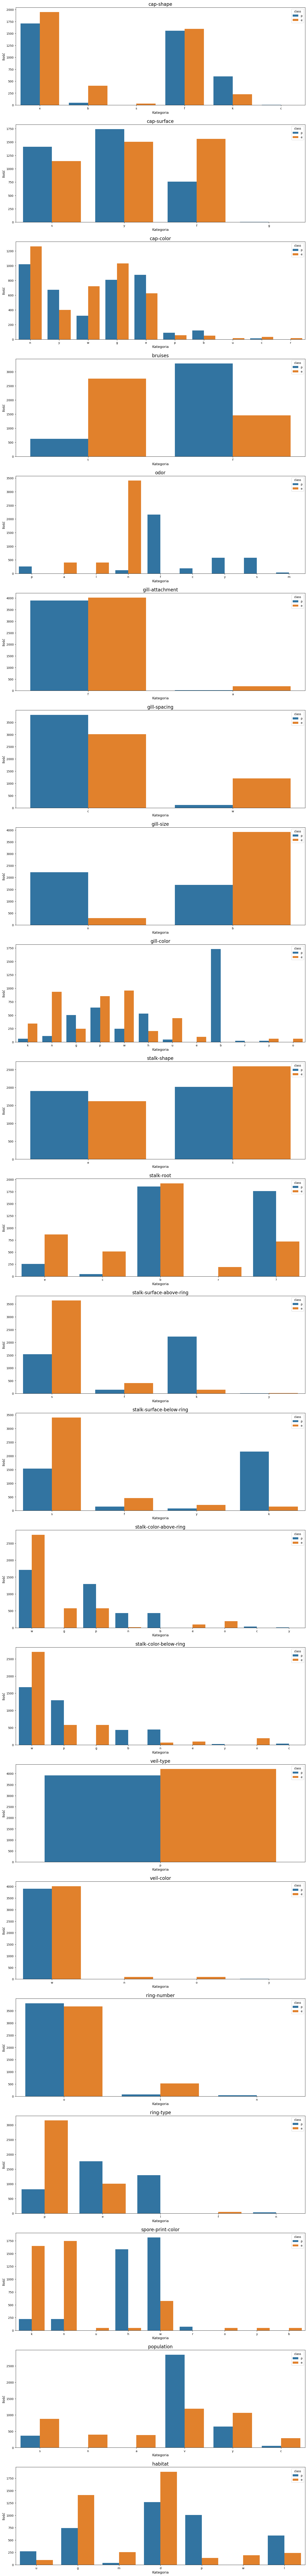

In [13]:
columns_to_analyze = df.columns.to_list()[1:]
columns_to_analyze

fig, ax = plt.subplots(nrows=len(columns_to_analyze), ncols=1, figsize=(18, 160))

for i, col in enumerate(columns_to_analyze):
    sns.countplot(df, x=col, hue='class', ax=ax[i])
    ax[i].set_title(col, fontsize=16)
    ax[i].set_xlabel('Kategoria', fontsize=12)
    ax[i].set_ylabel('Ilość', fontsize=12)

### Zmienna niezależna (stalk-root) pokazuje że większa ilość brakujących danych stanowią grzyby trujące - oznacza to że brak informacji o grzybni znacząco zwiększa prawdopodobnieństwo na to że grzyb jest trujący

## Grupy w których trujące grzyby miały znaczącą przewagę statystycznie
1. bruises : {f}
2. odor : {p, f, c, y, s, m}
3. gill-size : {n}
4. gill-color : {b}
5. ssar : {k}
6. ssbr : {k}
7. scar : {p, n, b, c, y}
8. scbr : {p, b, n, y, c}
9. ring-type : {l, n}
10. spore-print-color : {h, w, r}
11. population : {v}
12. habitat : {p, l}

# Przygotowanie danych i Inżynieria Cech (Data Processing & Feature Engineering)

In [14]:
print(f'Całkowita liczba wartości NaN w zbiorze: {df.isna().sum().sum()}') 
print(f'Całkowita rzeczywista liczba brakujących wartości w zbiorze: {df[df['stalk-root'] == '?']['stalk-root'].count()}')

Całkowita liczba wartości NaN w zbiorze: 0
Całkowita rzeczywista liczba brakujących wartości w zbiorze: 2480


In [15]:
df['stalk-root'] = df['stalk-root'].replace('?', 'Missing')
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [16]:
# Podział na zmienne z etykietami oraz cechami (features)
X = df.drop('class', axis=1)
y = df['class']

# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Utworzenie obiektów OHE oraz Label Encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
le = LabelEncoder()

# Kodowanie danych kategorycznych na numeryczne z użyciem metody One Hot Encoding
X_train_encoded = ohe.fit_transform(X_train)
X_test_encoded = ohe.transform(X_test)

# Kododwanie danych kategroycznych (e - edible , p - poisonous) na numeryczne sekwencyjne (0, 1)
# Jadalne przyjmują wartość 0 a trujące 1
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [18]:
X_test_encoded

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(2438, 117))

In [19]:
y_test.values

array(['e', 'p', 'p', ..., 'p', 'e', 'e'], shape=(2438,), dtype=object)

In [20]:
y_test_encoded

array([0, 1, 1, ..., 1, 0, 0], shape=(2438,))

# AdaBoost

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = AdaBoostClassifier(n_estimators=350)
model.fit(X_train_encoded, y_train_encoded)
#model.score(X_test_encoded, y_test_encoded)

ada_predicted = model.predict(X_test_encoded)
accuracy = accuracy_score(y_test_encoded, ada_predicted)
classification = classification_report(y_test_encoded, ada_predicted)
cmat = confusion_matrix(y_test_encoded, ada_predicted)


In [22]:
print(f"Accuaracy:\n {accuracy}\n")
print(f"Classification Report:\n {classification}\n")
print(f"Confusion Matrix:\n {cmat}")

Accuaracy:
 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Confusion Matrix:
 [[1257    0]
 [   0 1181]]


# XGBoost

In [23]:
model = xgb.XGBClassifier(learning_rate=0.05)
model.fit(X_train_encoded, y_train_encoded)

xgb_predicted = model.predict(X_test_encoded)
accuracy = accuracy_score(y_test_encoded, xgb_predicted)
classification = classification_report(y_test_encoded, xgb_predicted)
cmat = confusion_matrix(y_test_encoded, xgb_predicted)

In [24]:
print(f"Accuaracy:\n {accuracy}\n")
print(f"Classification Report:\n {classification}\n")
print(f"Confusion Matrix:\n {cmat}")

Accuaracy:
 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Confusion Matrix:
 [[1257    0]
 [   0 1181]]


# LightGBM

In [25]:
# Utworzenie obiektów Dataset wymaganych przez model LightGBM
lgb_train = lgb.Dataset(X_train_encoded, y_train_encoded) # Dataset treningowy
lgb_eval = lgb.Dataset(X_test_encoded, y_test_encoded, reference=lgb_train) # Dataset testowy z referencją do treningowego

# Hiperparametry modelu
params = {
    'objective': 'binary',            # Klasyfikacja binarna
    'metric': 'auc',                  # Metryka do monitorowania
    'boosting_type': 'gbdt',          # Gradient boosting
    #'num_leaves': 2,                 # Liczba liści w jednym drzewie
    'learning_rate': 0.01,             # Szybkość uczenia
    #'feature_fraction': 0.8           # Procent cech używanych w każdej iteracji
}

# Przekazania hiperparametrów oraz trenowanie modelu na danych treningowych z dodatkowymi argumentami usprawniającymi model

# Argumenty opis:
# num_boost_round - Maksymalna liczba drzew - iteracji
# valid_sets - Zbiory Dataset do walidacji
# callbacks - Zatrzymuje trening jeżeli po 100 iteracjach wynik się nie poprawi (Zwraca obecny najlepszy który uzyskał)

model = lgb.train(params, lgb_train, num_boost_round=400, valid_sets=[lgb_train, lgb_eval],) #callbacks=[lgb.early_stopping(500)])
# Mała ilość drzew oraz niski parametr callbacks uniemożliwiają modelowi uzyskanie 100%

[LightGBM] [Info] Number of positive: 2735, number of negative: 2951
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 214
[LightGBM] [Info] Number of data points in the train set: 5686, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.481006 -> initscore=-0.076013
[LightGBM] [Info] Start training from score -0.076013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [26]:
# W przeciwieństwie do innych modeli ten zwraca prawdopodobieństwo przynależności do klasy 1 (Trujących)
lgb_predicted_prob = model.predict(X_test_encoded, num_iteration=model.best_iteration)

# Aby uzyskać sklasyfikowane odpowiedzi musimy ustawić próg decyzyjny (standardowo 0.5)
# Jeżeli prawdopodobieństwo jest wyższe niż 0.5 sklasyfikuj jako trujący w innym przypadku sklasyfikuj jako jadalny dla każdego wyniku w lgb_predicted_prob
lgb_predicted = [1 if prob > 0.5 else 0 for prob in lgb_predicted_prob]

In [27]:
print(lgb_predicted_prob)
print(lgb_predicted[0:5])

[0.00878139 0.99052868 0.99052868 ... 0.99052868 0.00878139 0.00878139]
[0, 1, 1, 0, 1]


In [28]:
from sklearn.metrics import roc_auc_score

accuracy = accuracy_score(y_test_encoded, lgb_predicted)
classification = classification_report(y_test_encoded, lgb_predicted)
cmat = confusion_matrix(y_test_encoded, lgb_predicted)
roc_auc = roc_auc_score(y_test_encoded, lgb_predicted)

print(f"Accuaracy:\n {accuracy}\n")
print(f"Roc Auc Score:\n {roc_auc}\n")
print(f"Classification Report:\n {classification}\n")
print(f"Confusion Matrix:\n {cmat}")

Accuaracy:
 1.0

Roc Auc Score:
 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Confusion Matrix:
 [[1257    0]
 [   0 1181]]


# CatBoost

In [29]:
# Największą zaletą CatBoosta jest fakt że może przyjąć dane kategoryczne bez wcześniejszego kodowania, bezproblemowo zajmie się odpowiednim ich zakodowaniem. Wystarczy wskazać odpowiednie kolumny

# Utworzenie modelu i przekazanie hiperparametrów
model = CatBoostClassifier(
    iterations=500, # Maksymalna liczba drzew (iteracji)
    learning_rate=0.01, # Tempo nauczania
    # depth=6 - Głębokość drzew
    loss_function='Logloss', # Funkcja straty dla klasyfikacji binarnej
    verbose=100 # Wyświetla logi co n iteracji (Przekazanie argumentu False wyłączy wyświetlanie logów)
)

# Możemy przekazać wszystkie cechy ponieważ wszystkie są kategoryczne (DANE PRZED KODOWANIEM)
categorical_features_names = X_train.columns.to_list()

model.fit(X_train, y_train, cat_features=categorical_features_names, eval_set=(X_test, y_test),) #early_stopping_rounds=250)
cat_boost_predicted = model.predict(X_test)

0:	learn: 0.6663382	test: 0.6661540	best: 0.6661540 (0)	total: 164ms	remaining: 1m 21s
100:	learn: 0.0217639	test: 0.0208958	best: 0.0208958 (100)	total: 3.92s	remaining: 15.5s
200:	learn: 0.0084333	test: 0.0077075	best: 0.0077075 (200)	total: 8.41s	remaining: 12.5s
300:	learn: 0.0058038	test: 0.0051995	best: 0.0051995 (300)	total: 12.9s	remaining: 8.55s
400:	learn: 0.0040163	test: 0.0035080	best: 0.0035080 (400)	total: 17.5s	remaining: 4.33s
499:	learn: 0.0028809	test: 0.0024167	best: 0.0024167 (499)	total: 22.3s	remaining: 0us

bestTest = 0.002416668817
bestIteration = 499



In [30]:
accuracy = accuracy_score(y_test, cat_boost_predicted)
classification = classification_report(y_test, cat_boost_predicted)
cmat = confusion_matrix(y_test, cat_boost_predicted)

print(f"Accuaracy:\n {accuracy}\n")
print(f"Classification Report:\n {classification}\n")
print(f"Confusion Matrix:\n {cmat}")

Accuaracy:
 1.0

Classification Report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Confusion Matrix:
 [[1257    0]
 [   0 1181]]
